In [1]:
import pandas as pd
add=pd.read_csv("Advertising.csv")
df=add.copy()
df=df.iloc[:,1:]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [3]:
df.isnull().values.any()

False

In [4]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


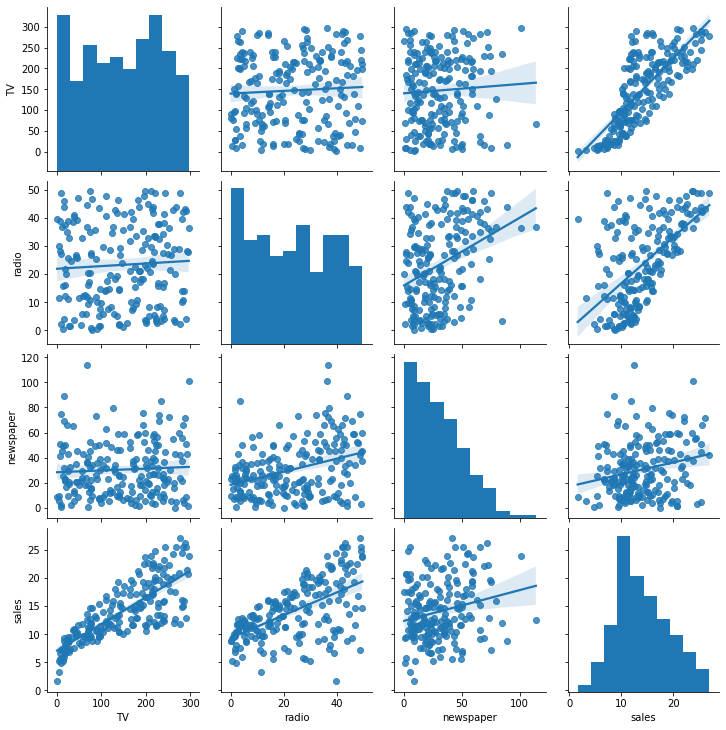

In [6]:
import seaborn as sns
sns.pairplot(df,kind="reg");

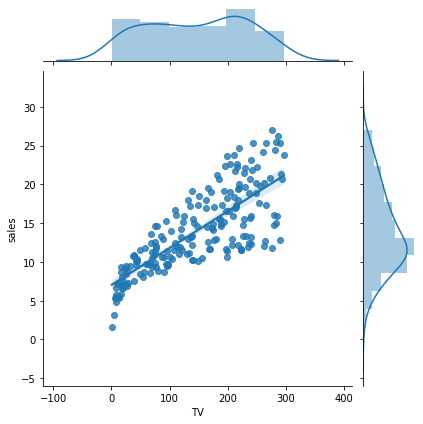

In [8]:
sns.jointplot(x="TV", y="sales", data=df, kind="reg")

In [11]:
import statsmodels.api as sm
X=df[["TV"]]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [12]:
X=sm.add_constant(X)
X[:5]


,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [13]:
y=df["sales"]
y[:5]


0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [14]:
lm=sm.OLS(y,X)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 12 Sep 2020   Prob (F-statistic):           1.47e-42
Time:                        12:01:06   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
import statsmodels.formula.api as smf
lm=smf.ols("sales ~ TV",df)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 12 Sep 2020   Prob (F-statistic):           1.47e-42
Time:                        12:09:43   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [17]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [18]:
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [19]:
model.f_pvalue

1.4673897001947095e-42

In [20]:
print("f_pvalue: %.3f"%model.f_pvalue)

f_pvalue: 0.000


In [21]:
print("fvalue: %.3f"%model.fvalue)

fvalue: 312.145


In [23]:
print("tvalue: %.3f"%model.tvalues[:1])

tvalue: 15.360


In [24]:
model.mse_model

3314.6181668686486

In [25]:
model.rsquared

0.611875050850071

In [26]:
model.rsquared_adj

0.6099148238341623

In [27]:
model.fittedvalues[:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [28]:
y[:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [29]:
print("Sales= {}+ {}*TV".format(model.params[0],model.params[1]))

Sales= 7.032593549127696+ 0.047536640433019764*TV


In [30]:
model.params[0]+model.params[1]*10000

482.39899787932535

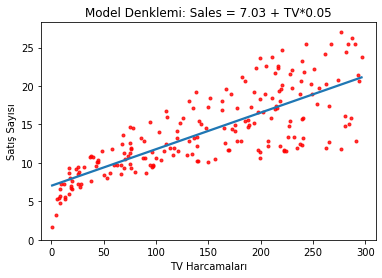

In [31]:
g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
import matplotlib.pyplot as plt
plt.xlim(-10,310)
plt.ylim(bottom=0);

In [32]:
from sklearn.linear_model import LinearRegression as lr
X=df[["TV"]]
Y=df["sales"]
reg=lr()
model=reg.fit(X,Y)
[model.intercept_,model.coef_]
model.score(X,Y)

0.611875050850071

In [33]:
[model.intercept_,model.coef_]

[7.032593549127693, array([0.04753664])]

In [34]:
model.predict(X)[:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [37]:
for i in range(0,1000):
    print("%d"%(model.intercept_+model.coef_*i),end=' ')

7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 2

In [38]:
new_data=[[5],[90],[200]]

In [39]:
model.predict(new_data)

array([ 7.27027675, 11.31089119, 16.53992164])

In [40]:
from sklearn.metrics import mean_squared_error,r2_score
lm=smf.ols("sales ~ TV",df)
model = lm.fit()
mse=mean_squared_error(y,model.fittedvalues)
mse

10.512652915656757

In [41]:
import numpy as np
rmse=np.sqrt(mse)
rmse

3.2423221486546887

In [42]:
reg.predict(X)[:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [43]:
k_t=pd.DataFrame({"Reel_y": y[:10],
                 "Problity_y":reg.predict(X)[:10]})


In [45]:
k_t["hata"]=k_t["Reel_y"]-k_t["Problity_y"]

In [46]:
k_t

,Reel_y,Problity_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [49]:
k_t["hata/^2"]=k_t["hata"]**2

In [50]:
k_t

,Reel_y,Problity_y,hata,hata/^2
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [51]:
[np.sum(k_t["hata/^2"]),np.mean(k_t["hata/^2"]),np.sqrt(np.mean(k_t["hata/^2"]))]

[92.90350329638103, 9.290350329638105, 3.048007599996776]

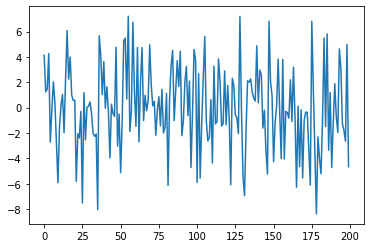

In [54]:
plt.plot(model.resid);

In [55]:
import pandas as pd
add=pd.read_csv("Advertising.csv",usecols=[1,2,3,4])
df=add.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [58]:
X=df.drop("sales", axis=1)
y=df["sales"]
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

In [61]:
X_train.shape

(160, 3)

In [62]:
y_train.shape

(160,)

In [60]:
X_test.shape

(40, 3)

In [64]:
y_test.shape

(40,)

In [65]:
lm = sm.OLS(y_train,X_train)

In [66]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Sat, 12 Sep 2020   Prob (F-statistic):                   1.28e-137
Time:                        13:59:56   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
lm=lr()
model=lm.fit(X_train,y_train)

In [68]:
model.intercept_

2.979067338122629

In [69]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [71]:
new_data=[[30],[10],[40]]
new_pd=pd.DataFrame(new_data).T
model.predict(new_pd)

array([6.32334798])

In [77]:
rmse=np.sqrt(mean_squared_error(y_train,model.predict(X_train)))
rmse

1.644727765644337

In [78]:
rmse=np.sqrt(mean_squared_error(y_test,model.predict(X_test)))
rmse

1.7815996615334502

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
X = df.drop('sales', axis=1)
y = df["sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=144)
lm = LinearRegression() 
model = lm.fit(X_train, y_train)

In [6]:
model.score(X_train,y_train)

0.8971614078663419

In [7]:
cross_val_score(model,X,y,cv =10,scoring="r2").mean()

0.8853562237979616

In [8]:
import pandas as pd
import numpy as np
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [11]:
y= df["Salary"]
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [12]:
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")

In [13]:
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [14]:
X = pd.concat([X_, dms[["League_N", "Division_W","NewLeague_N"]]], axis = 1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()

In [16]:
X_reduced_train=pca.fit_transform(scale(X_train))

In [17]:
X_reduced_train[0:1,:]

array([[-1.00458488,  1.27968666, -1.36586057]])

In [18]:
np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)[0:10]

array([ 46.33,  79.53, 100.  ])

In [19]:
lm=LinearRegression()

In [20]:
pcr_model=lm.fit(X_reduced_train,y_train)

In [21]:
pcr_model.intercept_

13.879375

In [22]:
y_pred = pcr_model.predict(X_reduced_train)
from sklearn.metrics import mean_squared_error,r2_score

In [23]:
np.sqrt(mean_squared_error(y_train,y_pred))

1.6748559274650712

In [24]:
df["Salary"].mean()

535.9258821292775

In [25]:
r2_score(y_train,y_pred)

0.8971614078663419

In [26]:
pca2=PCA()

In [27]:
X_reduced_test=pca2.fit_transform(scale(X_test))

In [28]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

3.743146117710547


In [29]:
from sklearn import model_selection
cv_10=model_selection.KFold(n_splits=10,
                           shuffle=True,
                           random_state=1)

In [30]:
lm=LinearRegression()

In [31]:
RMSE=[]

In [32]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

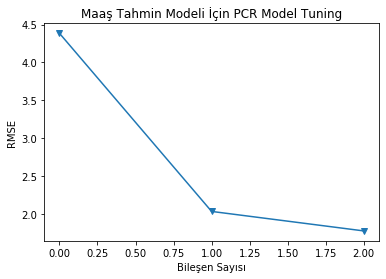

In [33]:
import matplotlib.pyplot as plt
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli İçin PCR Model Tuning');

In [35]:
lm=LinearRegression()
pcr_model=lm.fit(X_reduced_train[:,0:10],y_train)
y_pred=pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test,y_pred)))

3.743146117710547


In [36]:
from sklearn import model_selection
cv_10=model_selection.KFold(n_splits=10,
                           shuffle=True,
                           random_state=1)

In [39]:
lm=LinearRegression()
RMSE=[]
for i in np.arange(1,X_reduced_train.shape[1]+1):
    score=np.sqrt(-1*model_selection.cross_val_score(lm,
                                                    X_reduced_train[:,:i],
                                                    y_train.ravel(),
                                                    cv=cv_10,
                                                    scoring='neg_mean_squared_error').mean())
    RMSE.append(score)


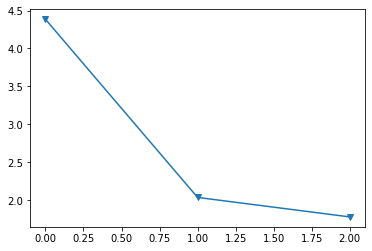

In [40]:
plt.plot(RMSE,'-v')

In [41]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [42]:
from sklearn.cross_decomposition import PLSRegression,PLSSVD

In [43]:
pls_model=PLSRegression(n_components=2).fit(X_train, y_train)
pls_model.coef_

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

In [46]:
pls_model.predict(X_train)[:5]

array([[344.91941493],
       [848.87070769],
       [692.93622642],
       [185.56577984],
       [435.49196077]])

In [47]:
y_pred = pls_model.predict(X_train)
np.sqrt(mean_squared_error(y_train,y_pred))

310.1167593109696

In [48]:
r2_score(y_train, y_pred)

0.5140424486535482

In [49]:
y_pred = pls_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

398.09956327448526

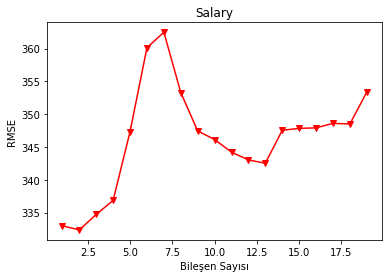

In [50]:
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)


#Hata hesaplamak için döngü
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Salary');

In [51]:
pls_model=PLSRegression(n_components = 2).fit(X_train,y_train)

In [52]:
y_pred = pls_model.predict(X_test)

In [53]:
np.sqrt(mean_squared_error(y_test,y_pred))

398.09956327448526

In [54]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [55]:
from sklearn.linear_model import Ridge

In [56]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)
ridge_model

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [57]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

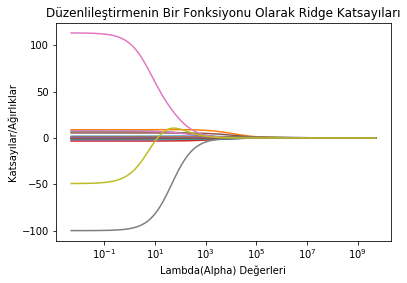

In [58]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    katsayilar.append(ridge_model.coef_) 
    

    
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');


In [59]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [60]:
from sklearn.linear_model import ElasticNet

In [61]:
enet_model = ElasticNet().fit(X_train, y_train)

C:\Users\HasanSucaKayman\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8487984.799367279, tolerance: 3898.686956380658
  positive)


In [62]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [63]:
enet_model.intercept_

-6.465955602113127

In [64]:
enet_model.predict(X_test)

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123,  702.9157117 ,  931.50283407,
        184.87939803,  385.14973787,  325.38944176,  546.99346574,
        774.28001821,  101.83114992, 1250.86758812,  370.67651244,
        442.05734523,  781.17288513,  578.63736538,  609.31927808,
        608.31719597,  227.46556223,  921.85505228,  301.1202457 ,
        386.31721051,  133.61143326,  162.28505608,   88.29793182,
        359.9068418 ,  422.51268445,  265.8663769 ,  355.70450908,
       1329.36312363,  125.05506935,   82.74580002,  269.17483075,
        117.13319397,  274.13484779,  648.4957249 ,  409.47065999,
        846.27919406,  712.04817644,  341.10596674,  368.24259678,
        305.70477656,  680.05724792,  716.13640636,  295.93204262,
        773.06445823,  249.28224916,  221.46794589,  541.2713245 ,
        611.50212372,  770.80228024,  168.45143906, 1159.05660

In [65]:
y_pred = enet_model.predict(X_test)

In [66]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.1676548181244

In [67]:
r2_score(y_test, y_pred)

0.41070222469326945

In [69]:
from sklearn.linear_model import ElasticNetCV


In [70]:
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)

In [71]:
enet_cv_model.alpha_

5230.7647364798695

In [72]:
enet_cv_model

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto', random_state=0,
             selection='cyclic', tol=0.0001, verbose=0)

In [73]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

In [74]:
y_pred = enet_tuned.predict(X_test)

In [75]:
np.sqrt(mean_squared_error(y_test, y_pred))

394.15280563218795